In [79]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
from scipy.stats import norm
import math

In [157]:
#### Very Basic Monte Carlo Simulation


# Get our stocks
def get_simulation(ticker, name):
    
    # Handle the ticker call API
    AdjCloseData = pd.DataFrame()
    AdjCloseData[ticker] = wb.DataReader(ticker, data_source='yahoo', start='2010-01-01')['Adj Close']
    
    # Create our Monte Carlo Simulation
    log_returns = np.log(1+ AdjCloseData.pct_change())
    
    u = log_returns.mean()
    
    var = log_returns.var()
    
    drift = u - (0.5 * var) 
    stdev = log_returns.std()
    
    time = 365
    loops = 10000
    
    daily_returns = np.exp(drift.values + stdev.values * norm.ppf(np.random.rand(time, loops)))
    
    longRecentClose = AdjCloseData.iloc[-1]
    RecentClose = round(longRecentClose[0],2)
    
    price_list = np.zeros_like(daily_returns)
    price_list[0] = RecentClose
    
    for t in range(1, time):
        price_list[t] = price_list[t - 1] * daily_returns[t]
        
    # Create our averages for our normal distribution
    endsim_prices = price_list[-1]
    movingavg = [np.mean(price_list)]
    endmean = endsim_prices.mean()
    endsigma = endsim_prices.std()
    stdevs1 = [(endmean + endsigma), (endmean - endsigma)]
    stdevs2 = [(endmean + (endsigma*2)), (endmean - (endsigma*2))]
    
    longavgreturn = ((endmean - RecentClose) / RecentClose)
    avgreturn = round(longavgreturn, 4) * 100
    
    # Print out our statistics
    print()
    print('The average price of {} per share over {} loops is: {}'.format(name, loops, round(endmean, 2)))
    print('Based on {}s most recent price of {} this represents an average return of {}% over {} days'.format(name, RecentClose, round(avgreturn,2), time))
    print('The algorithm is 68% confident the price will be between {} and {}.'.format(round(stdevs1[1],2), round(stdevs1[0],2)))
    print('The algorithm is 95% confident the price will be between {} and {}.'.format(round(stdevs2[1],2), round(stdevs2[0],2)))
    print()

    
    # Our histogram of ending prices after simulation
    plt.figure(figsize=(12,10))
    plt.xlabel('{} Stock Price'.format(name))
    plt.ylabel('Probability Density')
    plt.hist(endsim_prices, 50, density=True, color='c', edgecolor='k')
    # Our average of the ending prices
    plt.axvline(endmean, color='r', linestyle='dashed', linewidth=2, label='Avg. Price {}'.format(round(endmean, 2)))
    plt.axvline(stdevs1[0], color='r', linestyle='dashed', linewidth=2, label='One STDEV: {}'.format(round(stdevs1[0],2)))
    plt.axvline(stdevs1[1], color='r', linestyle='dashed', linewidth=2, label='One STDEV: {}'.format(round(stdevs1[1],2)))
    plt.title('Distribution of End Prices of {}'.format(name))
    plt.legend()
    
    
    
    # Monte Carlo Simulation
    plt.figure(figsize=(12,10))
    plt.title('Monte Carlo 1 Year '+ name)
    plt.ylabel("price {$}")
    plt.xlabel('Time {Days}')
    # Plot our price list
    plt.plot(price_list)
    # Create our average line
    
    
    plt.show()


The average price of CytoDyn per share over 10000 loops is: 2.2
Based on CytoDyns most recent price of 2.12 this represents an average return of 3.64% over 365 days
The algorithm is 68% confident the price will be between -2.2 and 6.59.
The algorithm is 95% confident the price will be between -6.6 and 10.99.



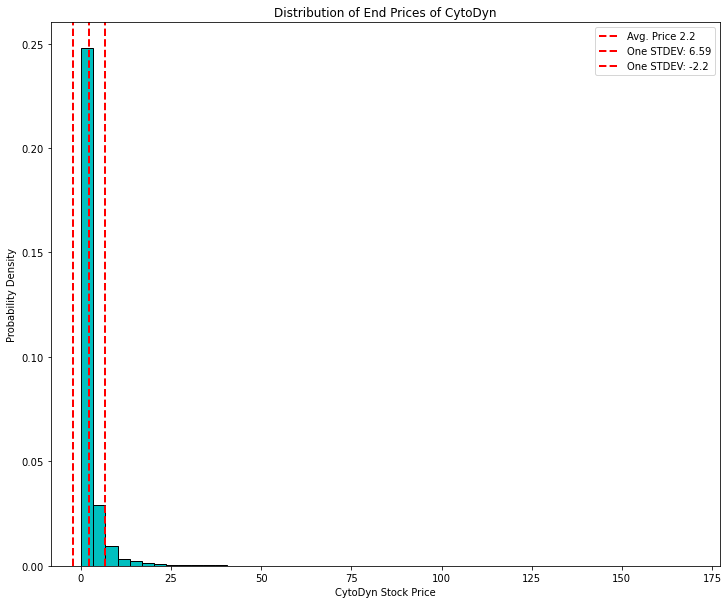

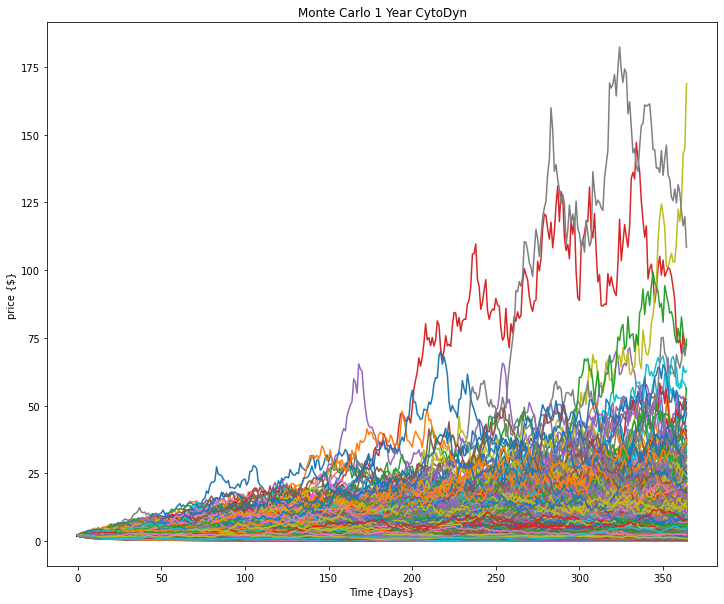

In [168]:
get_simulation('CYDY', 'CytoDyn')

In [ ]:
# 